# Lead Score - Case Study

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Reading  Data



In [2]:
# Loading the data using Pandas
df_lead = pd.read_csv("C:/Users/nuama/Downloads/Lead Scoring Assignment/Leads.csv")
df_lead

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent


### Checking the dataframe


In [3]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# checking shape of data
df_lead.shape

(9240, 37)

In [6]:
df_lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning

In [7]:
# Converting all the strings to lower case
df_lead=df_lead.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Replacing 'Select' with NaN because it is as good as a null value
df_lead = df_lead.replace('select',np.nan)

In [9]:
# Checking for unique values
df_lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [10]:
# Dropping columns with one unique value since it doesnt help in the analysis
df_lead_1= df_lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [11]:
# Checking the null values percentage 
round(100*(df_lead_1.isnull().sum()/len(df_lead_1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [12]:
# removing columns that have more than 35% missing values and not important for analysis
df_lead_2= df_lead_1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df_lead_2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [13]:
# Rechecking the percentage of missing values
round(100*(df_lead_2.isnull().sum()/len(df_lead_2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

As you can see there are 4 columns having more number of missing values,we replace these missing values with new category called "not mentioned" as if we replace the missing values with mode then it will affect the model. 

In [14]:
df_lead_2['Specialization'] = df_lead_2['Specialization'].fillna('not mentioned') 
df_lead_2['What matters most to you in choosing a course'] = df_lead_2['What matters most to you in choosing a course'].fillna('not mentioned')
df_lead_2['Country'] = df_lead_2['Country'].fillna('not mentioned')
df_lead_2['What is your current occupation'] = df_lead_2['What is your current occupation'].fillna('not mentioned')
df_lead_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [15]:
# check the percentage of missing values
round(100*(df_lead_2.isnull().sum()/len(df_lead_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [16]:
df_lead_2["Country"].value_counts()

india                   6492
not mentioned           2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switzerland   

In [17]:
def country_cat(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not mentioned":
        category = "not mentioned"
    else:
        category = "foreign"
    return category

df_lead_2['Country'] = df_lead_2.apply(lambda x:country_cat(x['Country']), axis = 1)
df_lead_2['Country'].value_counts()

india            6492
not mentioned    2461
foreign           287
Name: Country, dtype: int64

In [18]:
# Rechecking the percentage of missing values
round(100*(df_lead_2.isnull().sum()/len(df_lead_2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [19]:
# Checking the percentage of rows that will be removed if we remove the rows having null values
round(100*(sum(df_lead_2.isnull().sum(axis=1) > 1)/df_lead_2.shape[0]),2)

1.48

In [20]:
df_lead_2.isnull().sum()

Prospect ID                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

In [21]:
df_lead_3 = df_lead_2[df_lead_2.isnull().sum(axis=1) <1]

In [22]:
# checking percentage of rows left 
round(100*(df_lead_3.shape[0])/(df_lead.shape[0]),2)

98.2

In [23]:
# checking the percentage of missing values
round(100*(df_lead_3.isnull().sum()/len(df_lead_3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [24]:
# To check the value counts all the categorical values
for column in df_lead_3:
    print(df_lead_3[column].astype('category').value_counts())
    print('*****************************************************************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9074, dtype: int64
*****************************************************************************************
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
*****************************************************************************************
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      

In [25]:
# dropping "prospect id" since it doesnt help in further analysis as the values are unique for each customer
df_lead_final = df_lead_3.drop('Prospect ID',1)
df_lead_final.shape

(9074, 21)

## 2. EDA

### Univariate Analysis

   ####  Analysing categorical variables

In [26]:
df_lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

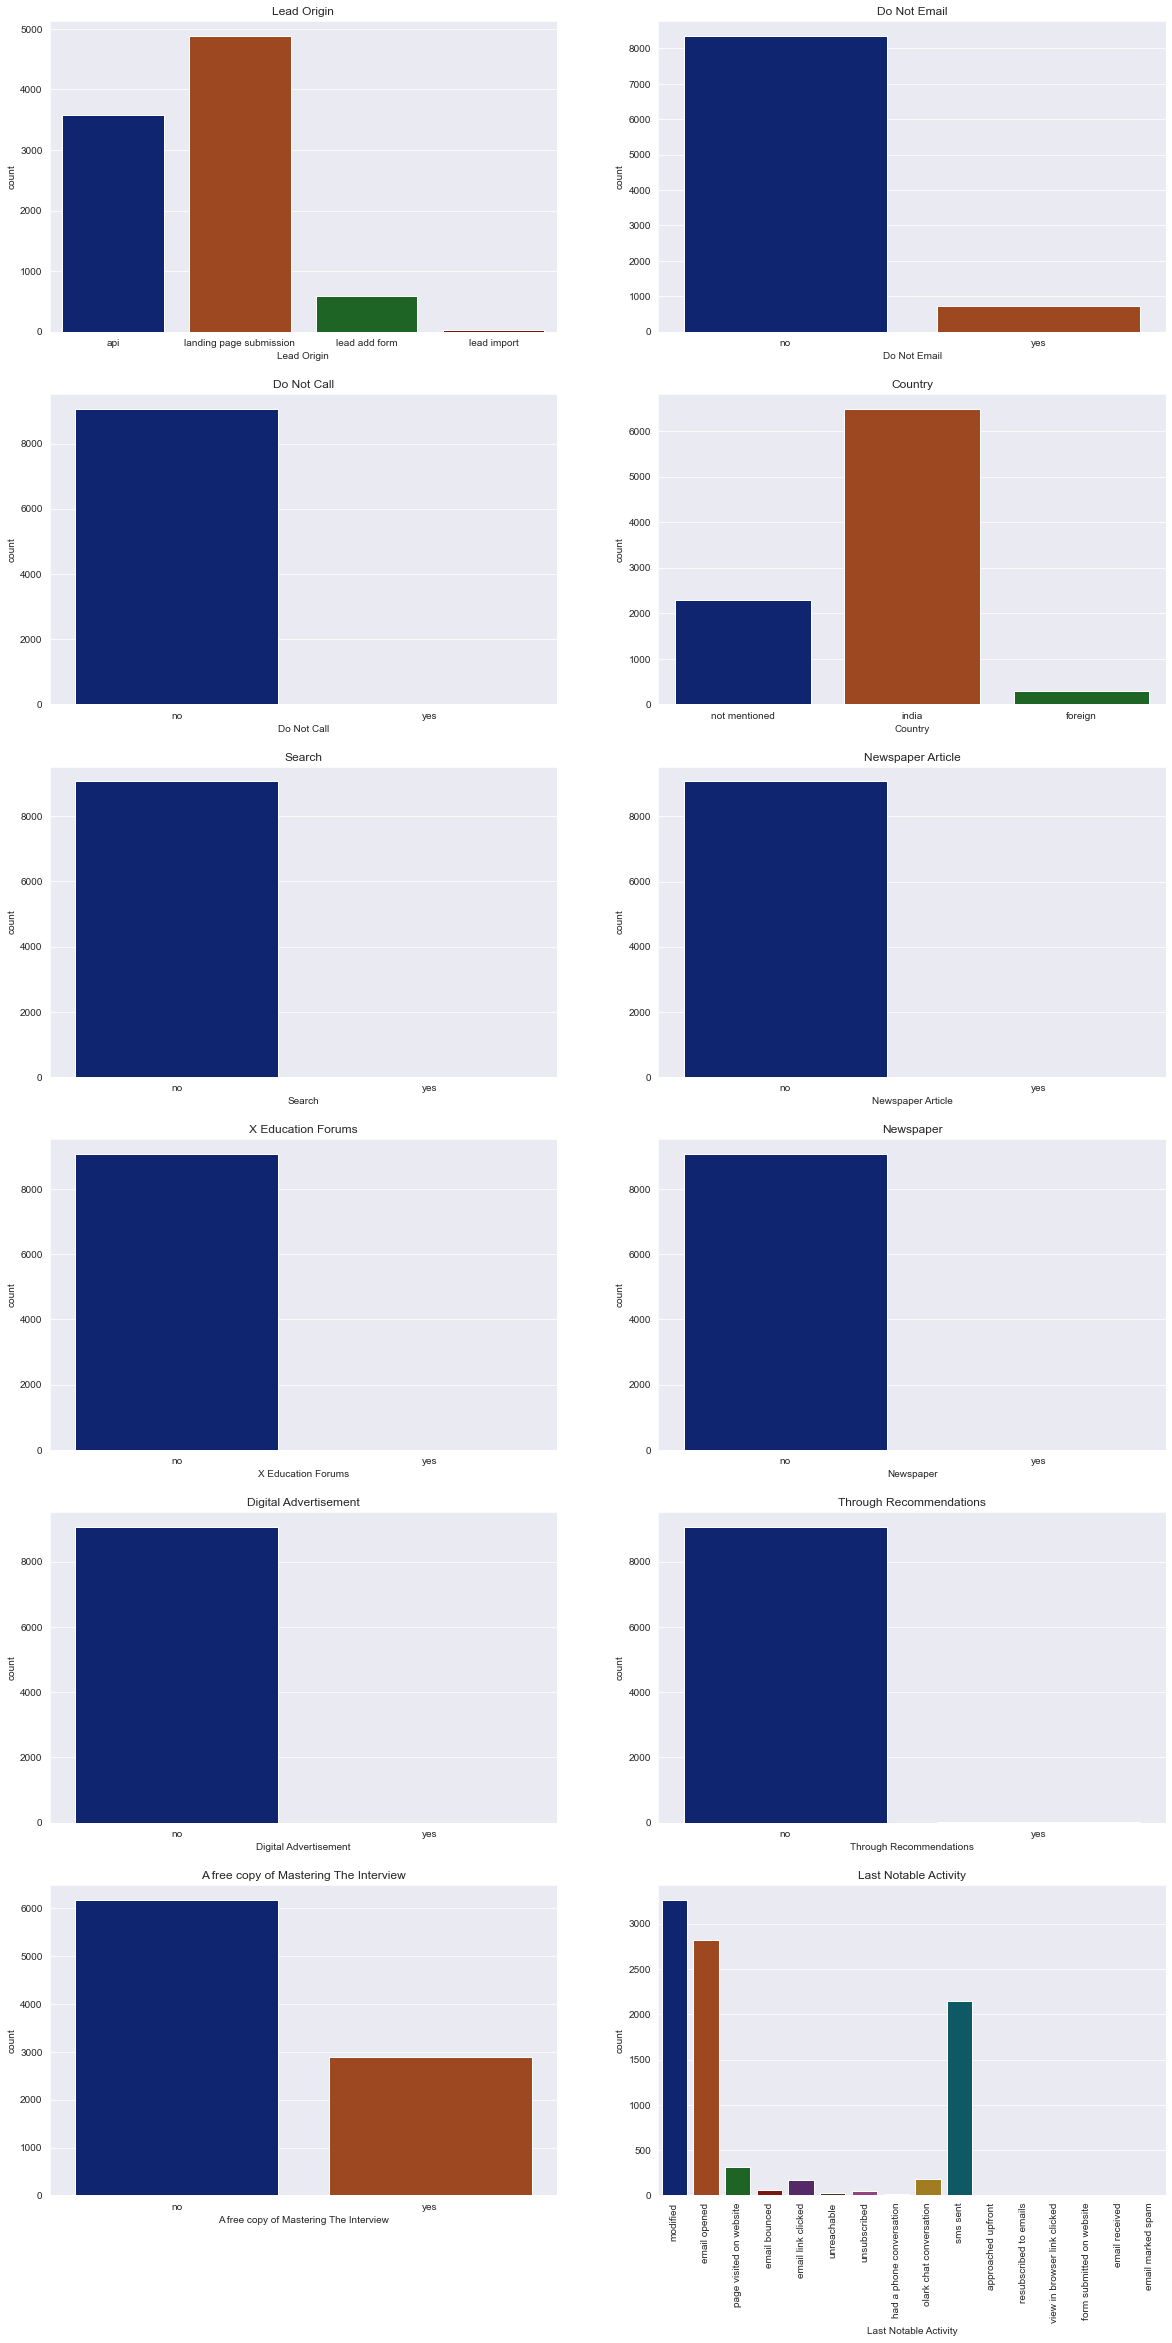

In [27]:
sns.set_style("darkgrid")

plt.figure(figsize = (20,40))


plt.subplot(6,2,1)
sns.countplot(df_lead_final['Lead Origin'],palette="dark")
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(df_lead_final['Do Not Email'],palette="dark")
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(df_lead_final['Do Not Call'],palette="dark")
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(df_lead_final['Country'],palette="dark")
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(df_lead_final['Search'],palette="dark")
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(df_lead_final['Newspaper Article'],palette="dark")
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(df_lead_final['X Education Forums'],palette="dark")
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(df_lead_final['Newspaper'],palette="dark")
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(df_lead_final['Digital Advertisement'],palette="dark")
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(df_lead_final['Through Recommendations'],palette="dark")
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(df_lead_final['A free copy of Mastering The Interview'],palette="dark")
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(df_lead_final['Last Notable Activity'],palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

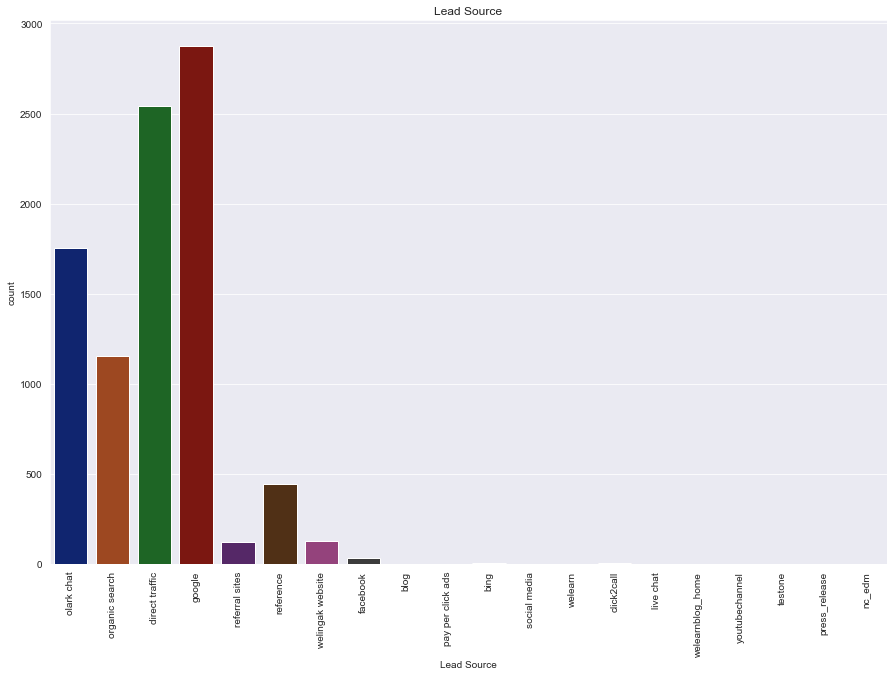

In [28]:
plt.figure(figsize = (15,10))
sns.countplot(df_lead_final['Lead Source'],palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

The highest number of leads are through google platform,direct traffic ,olark chat and organic search.

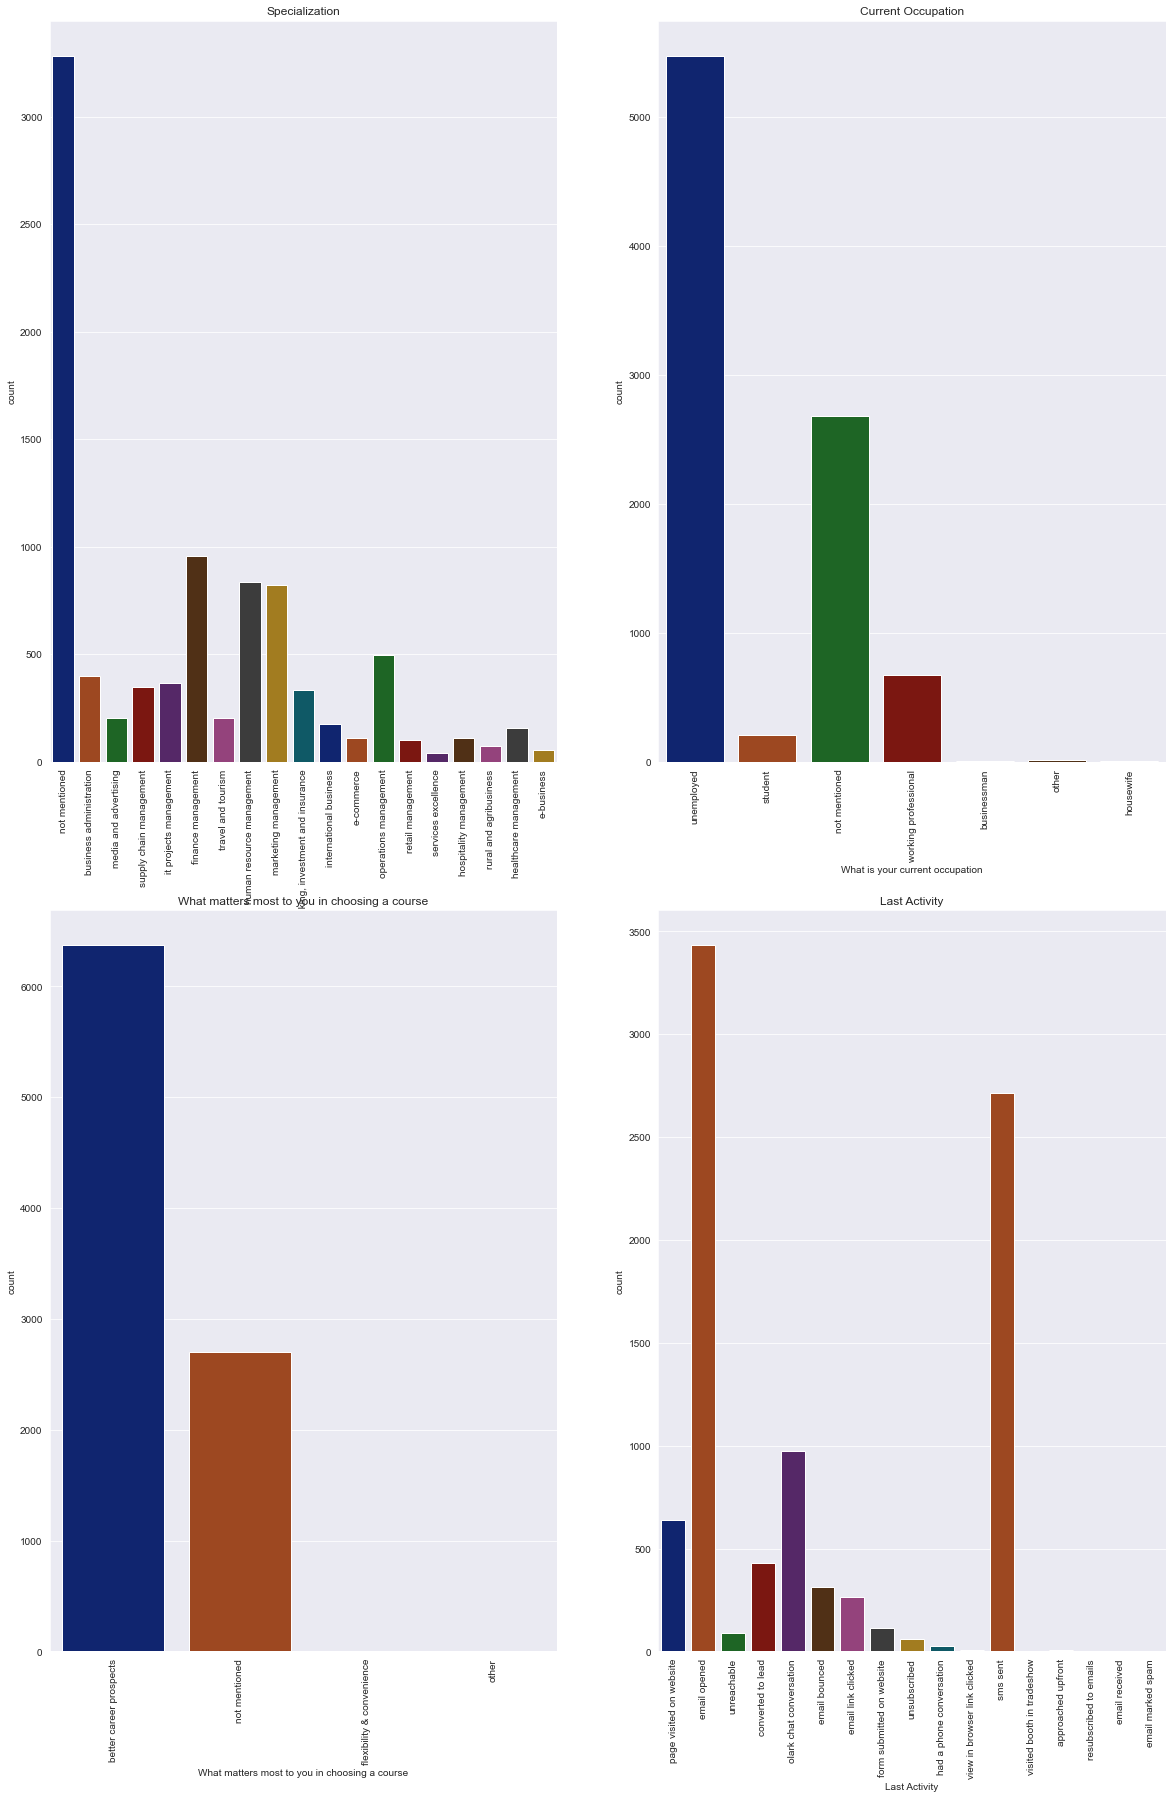

In [29]:
plt.figure(figsize = (20,30))
sns.set_style("darkgrid")
plt.subplot(2,2,1)
sns.countplot(df_lead_final['Specialization'],palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(df_lead_final['What is your current occupation'],palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(df_lead_final['What matters most to you in choosing a course'],palette="dark").tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(df_lead_final['Last Activity'],palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

1.Most number of leads are specialised in finance management and lowest are from services excellence.

2.Most of the leads are unemployed and least number of leads are either students,buisnessman,housewife or other occupation.

3.Most of the leads expect better career prospects.

4.Most of thr leads last activity was either opening email or sending sms.


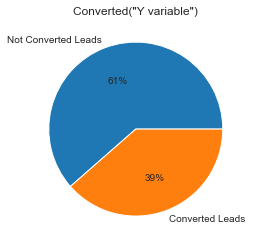

In [30]:
plt.pie(df_lead['Converted'].value_counts(normalize=True)*100,labels=["Not Converted Leads","Converted Leads"],autopct="%.f%%")
plt.title('Converted("Y variable")')
plt.show()

### Analysing  Numerical Variables

In [31]:
df_lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

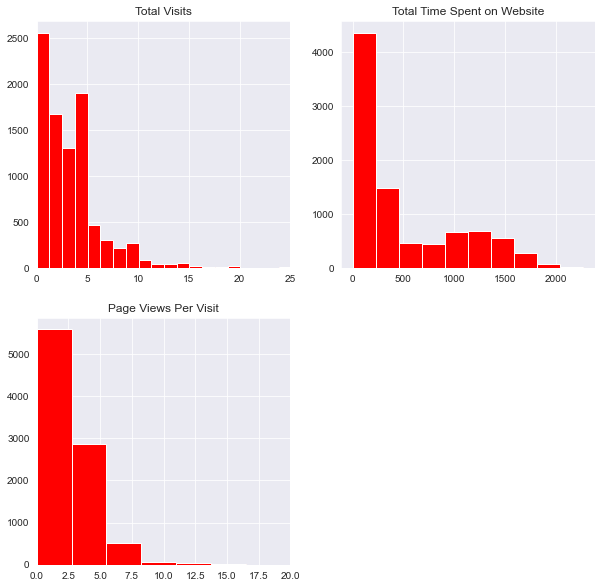

In [32]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_lead_final['TotalVisits'], bins = 200,color="red")
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_lead_final['Total Time Spent on Website'], bins = 10,color="red")
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_lead_final['Page Views Per Visit'], bins = 20,color="red")
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

1.Most of the leads have visited the website 0-5 times

2.Most of the leads have spent around 0-500 min on the website.

3.Most of the leads have viewed 0-5 pages on average.

### Bivariate Analysis

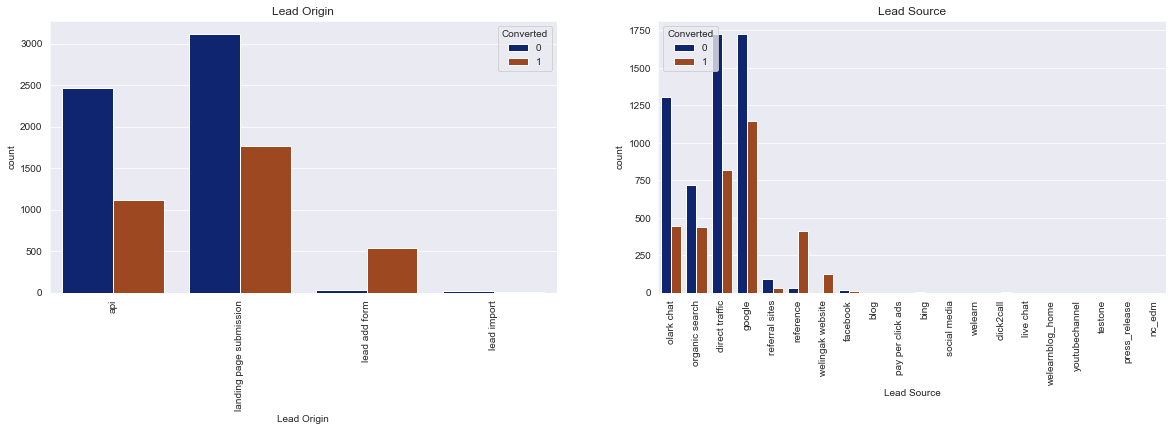

In [33]:
#plotting 'Lead Origin' and 'Lead Source' against converted
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

1.Most number of leads were found through landing page submission and lead add form has more number of leads converted than number of leads lost.

2.The number of conversions where more than the leads lost for these two sources reference and welingak website.

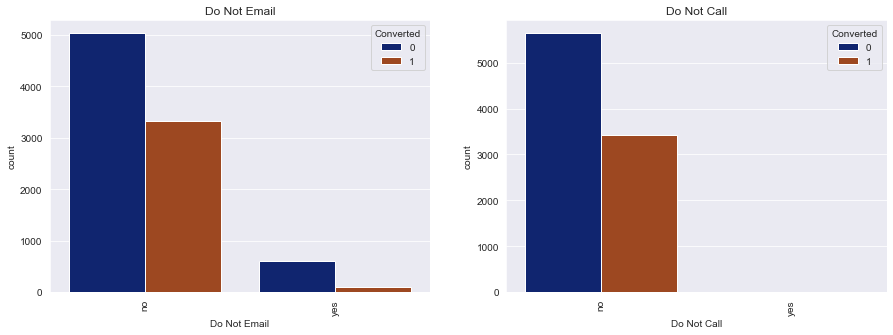

In [34]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

1.The leads who have opted for email did not convert as much as the leads who have not opted for email.

2.None of the leads have not opted for call option.

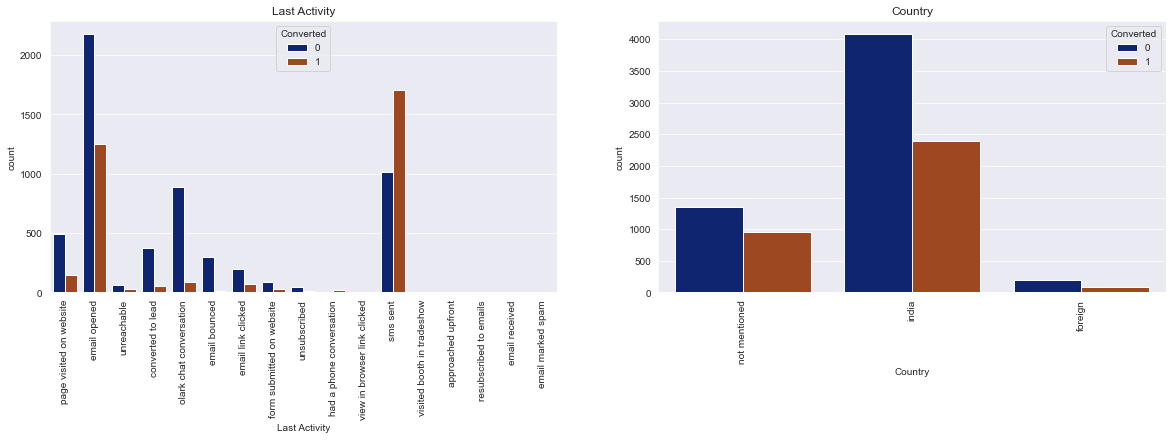

In [35]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

1.The leads whos last activity was sms sent converted the most.

2.The highest number of leads converted are from india.


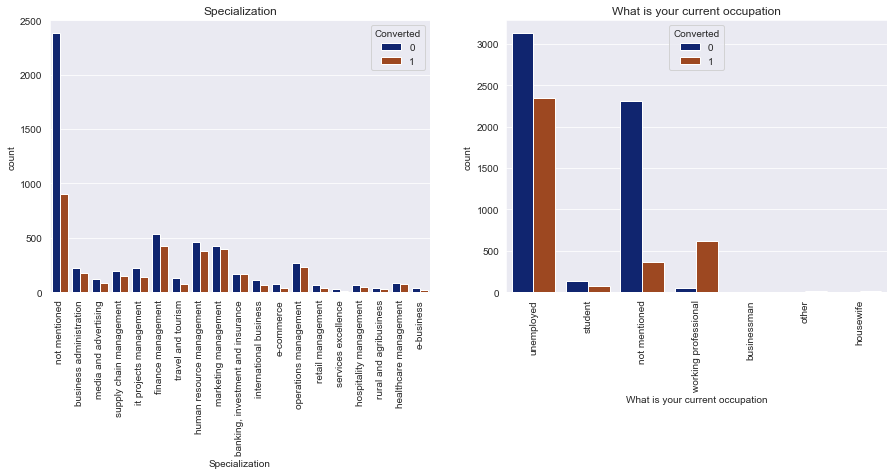

In [36]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

1.The leads having specialization of finance management,human resource managementa and marketing management have converted more than the leads from other specialization.

2.The leads who are working proffesionals have higher conversion rate.

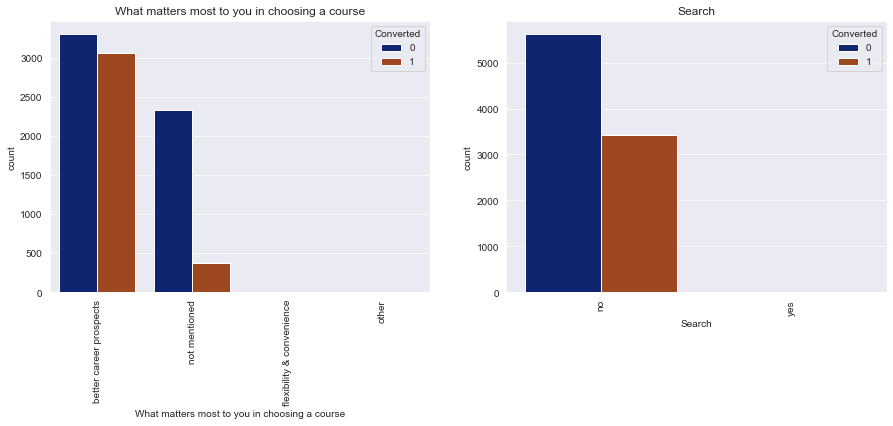

In [37]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

1.The Leads who expects better career prospects have converted the most.

2.There are no leads who have not searched the ads.

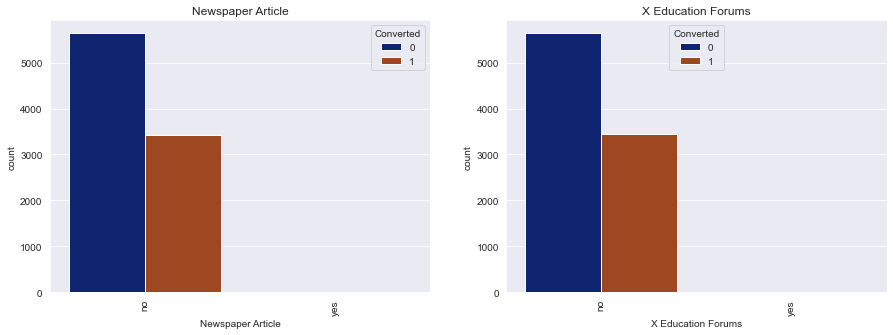

In [38]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

None of the leads have come through the Newspaper article or X Education forums.

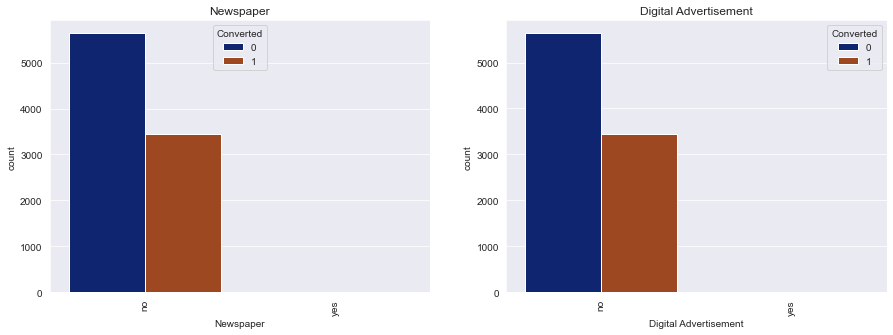

In [39]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

None of the leads have come through the Newspaper  or Digital Advertisements.

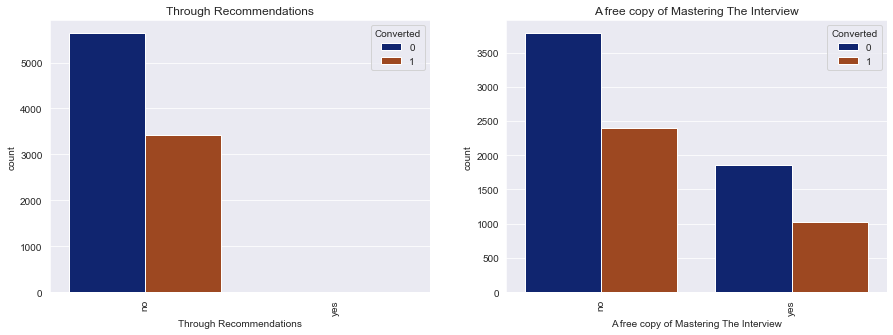

In [40]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= df_lead_final,palette="dark").tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

Most number of leads opted for a free copy of mastering the interview.


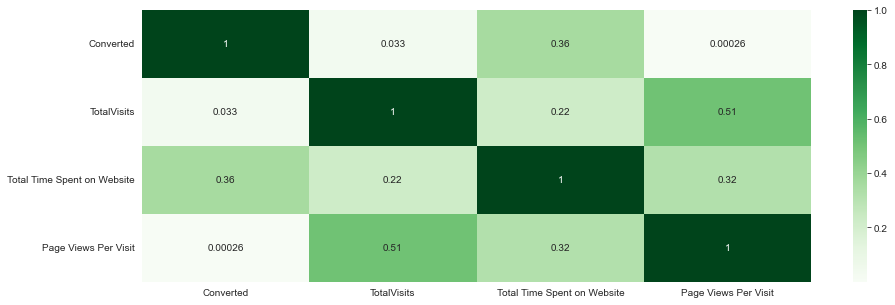

In [41]:
# To check the correlation among varibles
plt.figure(figsize=(15,5))
sns.heatmap(df_lead_final.corr(),annot=True,cmap="Greens")
plt.show()

There is high corelation between Page views per visit and Total visits.

In [42]:
numeric = df_lead_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


## 3. Dummy Variables

In [43]:
df_lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [44]:
df_lead_final.loc[:, df_lead_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(df_lead_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
lead_final_dum = pd.concat([df_lead_final, dummy], axis=1)
lead_final_dum

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.00,page visited on website,not mentioned,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.0,674,2.50,email opened,india,...,0,0,0,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.00,email opened,india,...,0,0,0,0,0,0,0,0,0,0
3,landing page submission,direct traffic,no,no,0,1.0,305,1.00,unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.0,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,landing page submission,direct traffic,yes,no,1,8.0,1845,2.67,email marked spam,foreign,...,0,0,0,0,0,0,0,0,0,0
9236,landing page submission,direct traffic,no,no,0,2.0,238,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9237,landing page submission,direct traffic,yes,no,0,2.0,199,2.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0
9238,landing page submission,google,no,no,1,3.0,499,3.00,sms sent,india,...,0,0,0,0,0,0,1,0,0,0


In [46]:
lead_final_dum = lead_final_dum.drop(['What is your current occupation_not mentioned','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not mentioned','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
lead_final_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,0,2.0,238,2.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,0,2.0,199,2.00,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9238,1,3.0,499,3.00,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 4. Test-Train Split

In [47]:
# Import the required library
from sklearn.model_selection import train_test_split

In [48]:
X = lead_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [49]:
# Putting the target variable in y
y = lead_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [50]:
# Splitting the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [51]:
# Import MinMax scaler to scale the numerical variables
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## 5. Model Building 

In [52]:
# Importing  'LogisticRegression'
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [53]:
# Import RFE
from sklearn.feature_selection import RFE

In [54]:
# Running RFE with 15 variables as output
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [55]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_landing page submission', False, 26),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Specialization_business administration', False, 33),
 ('Specialization_e-business', False, 32),
 ('Specialization_e-commerce', False, 23),
 ('Specialization_finance management', False, 30),
 ('Specialization_healthcare management', False, 25),
 ('Specialization_hospitality management', False, 45),
 ('Specialization_human resource management', False, 31),
 ('Specialization_international business', False, 37),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 22),
 ('Specialization_media and advertising', False, 42),
 ('Specialization_operations management', False, 27),
 ('Specialization_retail management', False, 63),
 ('Specialization_rural and agribusiness', False, 24),
 ('Specialization_serv

In [56]:
# we fetch all the coulumns selected by rfe being TRUE
col=X_train.columns[rfe.support_]

In [57]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [58]:
# Importing statsmodels
import statsmodels.api as sm

#### Model 1

In [59]:
X_train_sm = sm.add_constant(X_train)
logm1= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2635.0
Date:                Fri, 07 Jan 2022   Deviance:                       5270.1
Time:                        19:06:26   Pearson chi2:                 6.48e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4876      0.114    -30.661      0.000      -3.711      -3.265
TotalVisits                                              5.4367      1.437      3.782      0.000       2.619       8.254
Total Time Spent on Website                              4.6247      0.167     27.689      0.000       4.297       4.952
Lead Origin_lead add form                                3.7433      0.225     16.616      0.000       3.302       4.185
Lead Source_olark chat                                   1.5954      0.112     14.288      0.000       1.377       1.814
Lead Source_welingak website                             2.5982      1.033      2.515      0.012       0.574       4.623
Do Not Email_yes                                        -1.4275      0.170     -8.376      0.000      -1.762      -1.093
Last Activity_olark chat conversation                   -1.3875      0.168     -8.281      0.000      -1.716      -1.059
Last Activity_sms sent                                   1.2834      0.074     17.331      0.000       1.138       1.428
What is your current occupation_housewife               25.4080   3.09e+04      0.001      0.999   -6.05e+04    6.06e+04
What is your current occupation_other                    2.1868      0.755      2.895      0.004       0.706       3.667
What is your current occupation_student                  1.2705      0.227      5.604      0.000       0.826       1.715
What is your current occupation_unemployed               1.1800      0.086     13.680      0.000       1.011       1.349
What is your current occupation_working professional     3.7057      0.205     18.098      0.000       3.304       4.107
Last Notable Activity_had a phone conversation          24.0110   2.17e+04      0.001      0.999   -4.25e+04    4.26e+04
Last Notable Activity_unreachable                        1.8344      0.601      3.051      0.002       0.656       3.013
========================================================================================================================
"""

In [60]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.07
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


As VIF values are under 5 so there is no corelation among them and the p values for "Last Notable Activity_had a phone conversation" is 0.999 which is high hence we can safely drop that variable.	

In [62]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

#### Model 2

In [63]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2642.8
Date:                Fri, 07 Jan 2022   Deviance:                       5285.6
Time:                        19:06:26   Pearson chi2:                 6.48e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4831      0.114    -30.629      0.000      -3.706      -3.260
TotalVisits                                              5.6046      1.450      3.866      0.000       2.763       8.446
Total Time Spent on Website                              4.6104      0.167     27.675      0.000       4.284       4.937
Lead Origin_lead add form                                3.7375      0.225     16.591      0.000       3.296       4.179
Lead Source_olark chat                                   1.5910      0.112     14.249      0.000       1.372       1.810
Lead Source_welingak website                             2.5984      1.033      2.516      0.012       0.574       4.623
Do Not Email_yes                                        -1.4324      0.170     -8.409      0.000      -1.766      -1.099
Last Activity_olark chat conversation                   -1.3919      0.168     -8.310      0.000      -1.720      -1.064
Last Activity_sms sent                                   1.2754      0.074     17.245      0.000       1.130       1.420
What is your current occupation_housewife               23.4021   1.14e+04      0.002      0.998   -2.23e+04    2.23e+04
What is your current occupation_other                    2.1799      0.755      2.887      0.004       0.700       3.660
What is your current occupation_student                  1.2690      0.227      5.600      0.000       0.825       1.713
What is your current occupation_unemployed               1.1852      0.086     13.753      0.000       1.016       1.354
What is your current occupation_working professional     3.7035      0.205     18.099      0.000       3.302       4.105
Last Notable Activity_unreachable                        1.8251      0.601      3.036      0.002       0.647       3.003
========================================================================================================================
"""

In [64]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.59
7,Last Activity_sms sent,1.54
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
12,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


As VIF values are under 5 so there is no corelation among them and the p values for "What is your current occupation_housewife" is 0.998 which is high hence we can safely drop that variable.

In [65]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

#### Model 3

In [66]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2651.3
Date:                Fri, 07 Jan 2022   Deviance:                       5302.6
Time:                        19:06:26   Pearson chi2:                 6.50e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4533      0.113    -30.579      0.000      -3.675      -3.232
TotalVisits                                              5.5427      1.444      3.838      0.000       2.712       8.373
Total Time Spent on Website                              4.6048      0.166     27.690      0.000       4.279       4.931
Lead Origin_lead add form                                3.7501      0.225     16.651      0.000       3.309       4.192
Lead Source_olark chat                                   1.5802      0.111     14.187      0.000       1.362       1.798
Lead Source_welingak website                             2.5821      1.033      2.500      0.012       0.558       4.607
Do Not Email_yes                                        -1.4360      0.170     -8.437      0.000      -1.770      -1.102
Last Activity_olark chat conversation                   -1.3974      0.167     -8.348      0.000      -1.725      -1.069
Last Activity_sms sent                                   1.2672      0.074     17.164      0.000       1.123       1.412
What is your current occupation_other                    2.1567      0.755      2.857      0.004       0.677       3.636
What is your current occupation_student                  1.2456      0.226      5.502      0.000       0.802       1.689
What is your current occupation_unemployed               1.1632      0.086     13.582      0.000       0.995       1.331
What is your current occupation_working professional     3.6797      0.204     18.008      0.000       3.279       4.080
Last Notable Activity_unreachable                        1.8153      0.601      3.022      0.003       0.638       2.993
========================================================================================================================
"""

In [67]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
2,Lead Origin_lead add form,1.58
7,Last Activity_sms sent,1.53
3,Lead Source_olark chat,1.51
6,Last Activity_olark chat conversation,1.37
11,What is your current occupation_working profes...,1.32
4,Lead Source_welingak website,1.31
5,Do Not Email_yes,1.06


As VIF values are under 5 so there is no corelation among them and the p values for "Lead Source_welingak website"  is high hence we can safely drop that variable.

In [68]:
X_train.drop('Lead Source_welingak website', axis = 1, inplace = True)

#### Model 4

In [69]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.0
Date:                Fri, 07 Jan 2022   Deviance:                       5316.0
Time:                        19:06:26   Pearson chi2:                 6.70e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4546      0.113    -30.587      0.000      -3.676      -3.233
TotalVisits                                              5.5313      1.445      3.829      0.000       2.700       8.363
Total Time Spent on Website                              4.6040      0.166     27.691      0.000       4.278       4.930
Lead Origin_lead add form                                4.1012      0.218     18.821      0.000       3.674       4.528
Lead Source_olark chat                                   1.5789      0.111     14.177      0.000       1.361       1.797
Do Not Email_yes                                        -1.4204      0.169     -8.424      0.000      -1.751      -1.090
Last Activity_olark chat conversation                   -1.3895      0.167     -8.332      0.000      -1.716      -1.063
Last Activity_sms sent                                   1.2691      0.074     17.205      0.000       1.125       1.414
What is your current occupation_other                    2.1578      0.755      2.859      0.004       0.679       3.637
What is your current occupation_student                  1.2276      0.228      5.390      0.000       0.781       1.674
What is your current occupation_unemployed               1.1649      0.086     13.601      0.000       0.997       1.333
What is your current occupation_working professional     3.6684      0.205     17.930      0.000       3.267       4.069
Last Notable Activity_unreachable                        1.8087      0.602      3.003      0.003       0.628       2.989
========================================================================================================================
"""

In [70]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_unemployed,2.30
1,Total Time Spent on Website,2.06
0,TotalVisits,1.85
6,Last Activity_sms sent,1.53
3,Lead Source_olark chat,1.51
5,Last Activity_olark chat conversation,1.37
10,What is your current occupation_working profes...,1.30
2,Lead Origin_lead add form,1.27
4,Do Not Email_yes,1.06
8,What is your current occupation_student,1.05


## 6. Creating Prediction

In [71]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.647823
3604    0.132879
5584    0.235321
7679    0.132879
7563    0.498906
7978    0.777997
7780    0.167219
7863    0.859541
838     0.770691
708     0.149262
dtype: float64

In [72]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64782295, 0.13287916, 0.23532123, 0.13287916, 0.49890645,
       0.7779968 , 0.16721925, 0.85954122, 0.77069085, 0.14926181])

In [73]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.647823
1,0,0.132879
2,0,0.235321
3,0,0.132879
4,0,0.498906


In [74]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.647823,1
1,0,0.132879,0
2,0,0.235321,0
3,0,0.132879,0
4,0,0.498906,0


## 7. Model Evaluation

In [75]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [76]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 747, 1709]], dtype=int64)

In [77]:
# Predicted     not_churn    churn
# Actual
# not_churn        3438       457
# churn             747      1709

In [78]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8104235553456148

Since accuracy is 81% the model can be considered as a good model

In [79]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [80]:
# Calculating the sensitivity
TP/(TP+FN)

0.6958469055374593

In [81]:
# Calculating the specificity
TN/(TN+FP)

0.8826700898587934

For the current cut off  0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of 88%.

## 7. To Find the Optimal Cut off 

The previous cut off was randomely selected. Now to find the optimum one

In [82]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [83]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

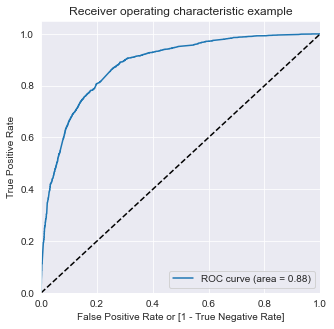

In [84]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.88 which is a very good value.

In [85]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.647823,1,1,1,1,1,1,1,1,0,0,0
1,0,0.132879,0,1,1,0,0,0,0,0,0,0,0
2,0,0.235321,0,1,1,1,0,0,0,0,0,0,0
3,0,0.132879,0,1,1,0,0,0,0,0,0,0,0
4,0,0.498906,0,1,1,1,1,1,0,0,0,0,0


In [86]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.576917,0.983713,0.320411
0.2,0.2,0.758778,0.913274,0.661361
0.3,0.3,0.788852,0.872557,0.736072
0.4,0.4,0.809479,0.766287,0.836714
0.5,0.5,0.810424,0.695847,0.882670
0.6,0.6,0.803023,0.627443,0.913736
0.7,0.7,0.773264,0.503257,0.943517
0.8,0.8,0.754212,0.416124,0.967394
0.9,0.9,0.700835,0.244707,0.988447


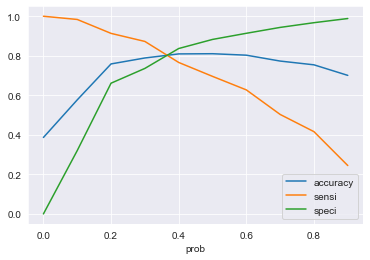

In [87]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

So from the above plotted graph we take 0.35 as the optimal cutoff.

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647823,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.132879,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.235321,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.132879,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.498906,0,1,1,1,1,1,0,0,0,0,0,1


In [89]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8033380569988978

In [90]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3128,  767],
       [ 482, 1974]], dtype=int64)

In [91]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [92]:
# Calculating the sensitivity
TP/(TP+FN)

0.8037459283387622

In [93]:
# Calculating the specificity
TN/(TN+FP)

0.8030808729139923

Since accuracy,sensitivity and specificity are at 80% ,0.35 is the optimal cutoff for the model.

## 8. Prediction on Test set

In [94]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [95]:
# Substituting all the columns in the final train model
col = X_train.columns

In [96]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,0,0,0,0,0,0,0,1,0,0
7212,1.0,0.028369,0.001320,0,0,0,0,1,0,0,0,1,0
2085,1.0,0.000000,0.000000,1,0,0,0,0,0,0,1,0,0
4048,1.0,0.028369,0.617077,0,0,0,0,1,0,0,1,0,0
4790,1.0,0.028369,0.005282,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,0,1,0,1,0,0,0,1,0,0
8179,1.0,0.170213,0.148768,0,0,0,0,1,0,0,0,0,0
6236,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
5240,1.0,0.078014,0.458627,0,0,0,0,1,0,0,1,0,0


In [97]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456467
1,1,0.838331
2,1,0.859541
3,1,0.878393
4,0,0.108276


In [98]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456467,1
1,1,0.838331,1
2,1,0.859541,1
3,1,0.878393,1
4,0,0.108276,0
...,...,...,...
2718,1,0.109059,0
2719,0,0.363759,1
2720,0,0.132879,0
2721,1,0.820891,1


In [99]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8075651854572163

In [100]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1403,  341],
       [ 183,  796]], dtype=int64)

In [101]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [102]:
# Calculating the sensitivity
TP/(TP+FN)

0.8130745658835546

In [103]:
# Calculating the specificity
TN/(TN+FP)

0.8044724770642202

Since accuracy,sensitivity and specificity are at 80% ,0.35 is the optimal cutoff for the model.

## 9. Precision-Recall

In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3438,  457],
       [ 747, 1709]], dtype=int64)

In [105]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7890120036934442

In [106]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6958469055374593

So for the cut off as 0.35 we have Precision around 78% and Recall around 70%.

####  Precision and recall tradeoff

In [107]:
from sklearn.metrics import precision_recall_curve

In [108]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

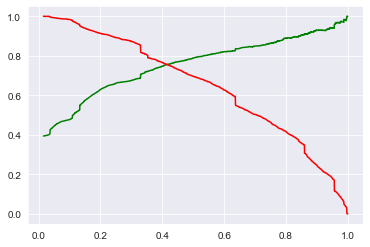

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.647823,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.132879,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.235321,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.132879,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.498906,0,1,1,1,1,1,0,0,0,0,0,1


In [112]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8108959219020627

In [113]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3287,  608],
       [ 593, 1863]], dtype=int64)

In [114]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [115]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7539457709429381

In [116]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7585504885993485

For the  cut off as 0.41 we have Precision around 74% and Recall around 76%.

## 10. Prediction on Test set

In [117]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.456467
1,1,0.838331
2,1,0.859541
3,1,0.878393
4,0,0.108276


In [118]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.456467,1
1,1,0.838331,1
2,1,0.859541,1
3,1,0.878393,1
4,0,0.108276,0
...,...,...,...
2718,1,0.109059,0
2719,0,0.363759,0
2720,0,0.132879,0
2721,1,0.820891,1


In [119]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8152772677194271

In [120]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1470,  274],
       [ 229,  750]], dtype=int64)

In [121]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [122]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.732421875

In [123]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7660878447395302

Hence for the current cut off as 0.41 we have Precision around 73% and Recall around 75%.

## Conclusion
It was found that the variables that mattered the most in the potential buyers are :
1.	Total number of visits.
2.	The total time spend on the Website.
3.	When the lead source was: <br>
a.	Google<br>
b.	Direct traffic<br>
c.	Organic search<br>

4.	When the last activity was:<br>
a.	SMS<br>
b.	Olark chat conversation<br>
5.	When the lead origin is Lead add form.
6.	When their current occupation is as a working professional, student, unemployed or other.<br>
7. The option given by the company to get an email from company is an important variable.
8. The Last Notable Activity where student is unreachable.



,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_unreachable
1289,0.014184,0.612676,0,0,0,0,0,0,0,1,0,0
3604,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
5584,0.042553,0.751761,0,0,1,0,0,0,0,0,0,0
7679,0.000000,0.000000,0,1,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0,0,1,0,0,0,0,1,0,0
